In [1]:
import obspy
import matplotlib.pylab as plt
import numpy as np
from hydrophone_data_processing import plotting
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, aic_simple
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger
from obspy.signal.cross_correlation import correlation_detector
from pprint import pprint

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chan = 'GHZ'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = [ 'A01' ,'A02' , 'A03' , 'A04' , 'A05' , 'A06' , 'A07' , 'A08' , 'A10' , 'A11' ]
#statlist = ['A04']
day = 15
hr = 13

In [4]:
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')
stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))
for s in statlist[1:]:
    
    stream += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan + ".2020.0" + str(day))
    
stream_snapshot = stream.slice(starttime=start_time+hr*3600,endtime=start_time+(hr+1)*3600)

Exception: No file matching file pattern: /media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/A01/*..GHZ.2020.015

In [5]:
stream_filt = stream_snapshot.filter('highpass', corners=4, freq=20, zerophase=True)

In [6]:
stream_2 = stream_filt.copy()

In [7]:
df = stream_2[2].stats.sampling_rate
rec_cft = recursive_sta_lta(stream_2[1].data, nsta=int(1*df), nlta=int(10*df))

/home/sbrent/research/Oman/venv/lib/python3.8/site-packages/obspy/signal/trigger.py:579: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()
/home/sbrent/research/Oman/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


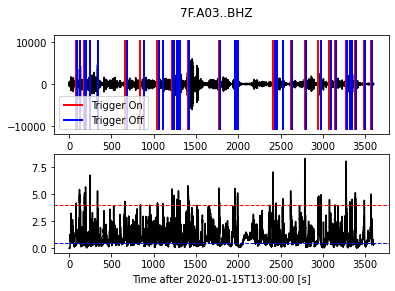

In [8]:
thr_on = 4
thr_off = 0.5
plot_trigger(stream_2[2], rec_cft, thr_on, thr_off)

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3, rowspan=2, sharex=ax)

data = stream_2[2]

ax.plot(data.times('matplotlib'), data.data)
# ax.text(s='hydrophone 3', x=0.)
ax.xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))

data.spectrogram(wlen=0.1, cmap='nipy_spectral', axes=ax2,)
#ax2.set_ylim(1e-2, 1e2)
#fig.tight_layout(pad=0)